# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing

In [2]:
data = pd.read_csv('customer segmentation.csv')

In [3]:
data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [4]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [6]:
data.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [7]:
data.dropna(subset=['Work_Experience','Profession','Graduated','Ever_Married','Family_Size','Var_1'],inplace=True)

In [8]:
data.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [9]:
data.describe()

,ID,Age,Work_Experience,Family_Size
count,2154.000000,2154.000000,2154.000000,2154.000000
mean,463496.744661,43.461467,2.551532,2.837047
std,2591.465156,16.761895,3.344917,1.566872
min,458989.000000,18.000000,0.000000,1.000000
25%,461282.250000,30.000000,0.000000,2.000000
50%,463535.000000,41.000000,1.000000,2.000000
75%,465705.750000,52.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


In [10]:
data.duplicated().sum()

0

In [11]:
numerical_columns = data.select_dtypes(include=['int64','float64']).columns
print(numerical_columns)

Index(['ID', 'Age', 'Work_Experience', 'Family_Size'], dtype='object')


In [12]:
print(data.columns)

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')


# Data Visualization

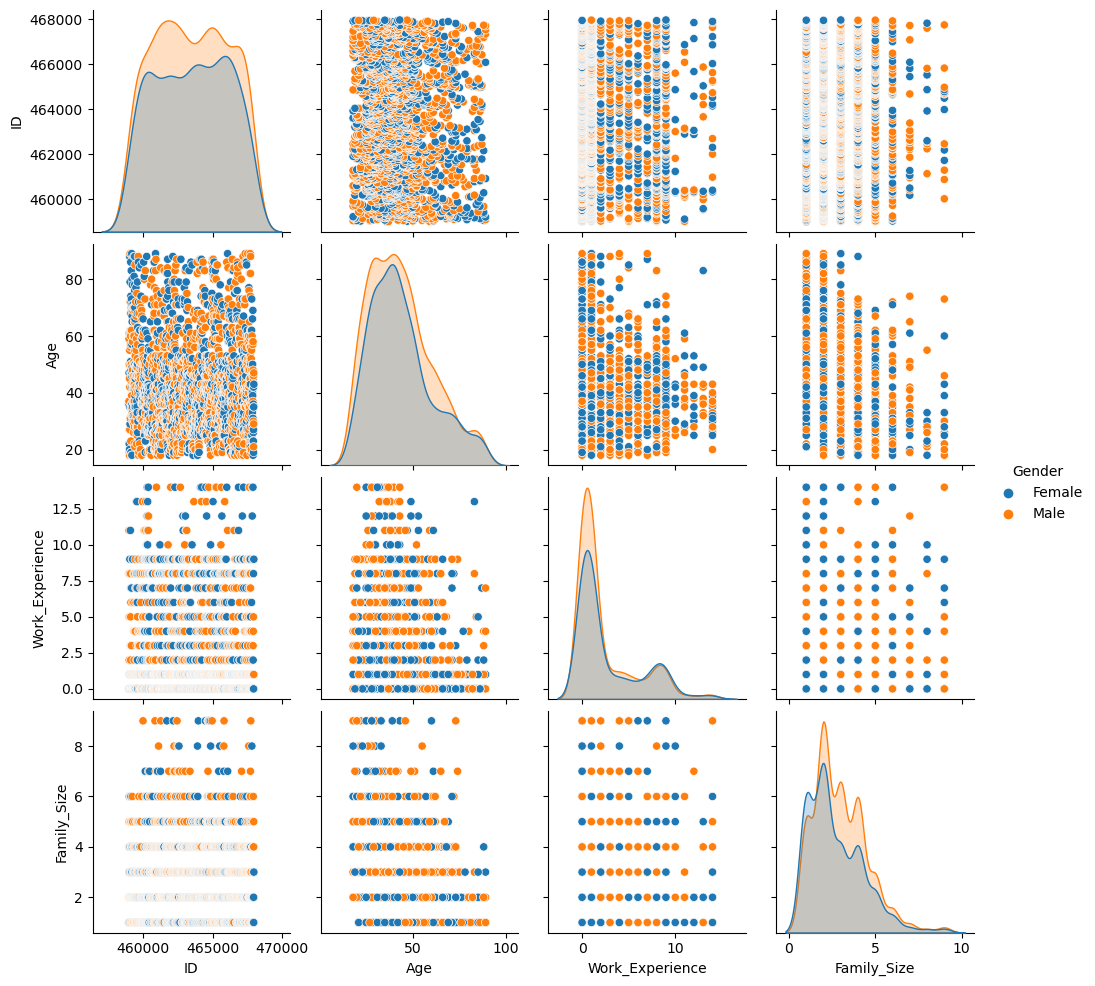

In [13]:
sns.pairplot(data,hue='Gender')
plt.show()

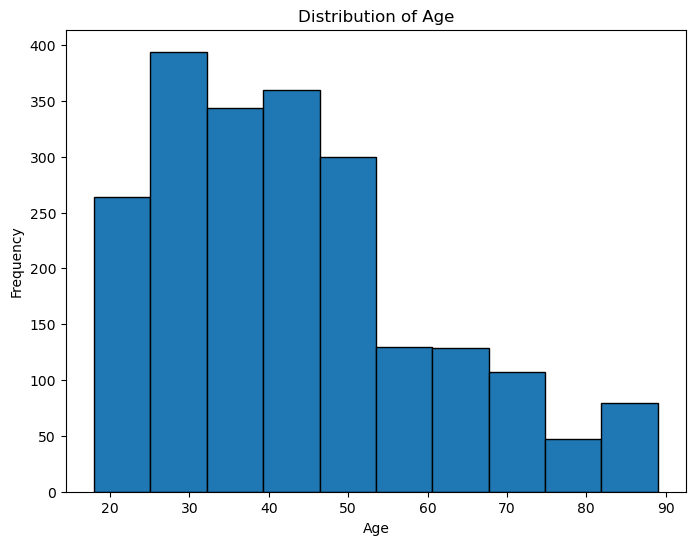

In [14]:
plt.figure(figsize=(8,6))
plt.hist(data['Age'], bins=10, edgecolor ='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

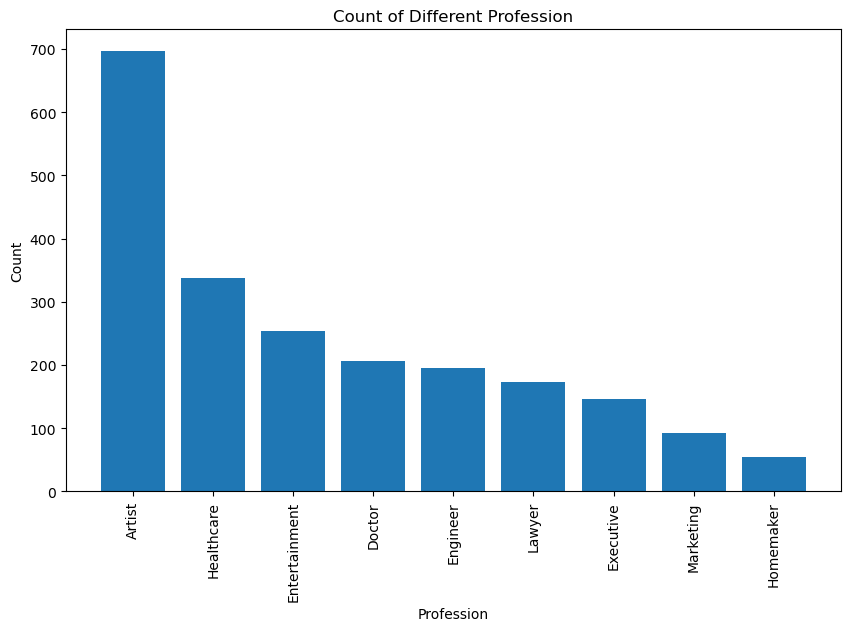

In [15]:
profession_counts = data['Profession'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(profession_counts.index, profession_counts.values)
plt.title('Count of Different Profession')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.show()

PIE CHART

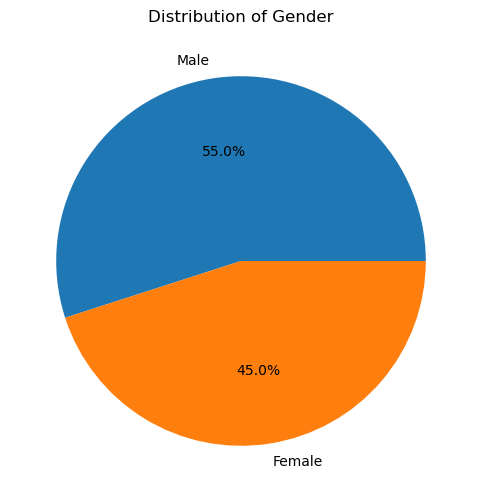

In [16]:
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Gender')
plt.show()


BOX PLOT

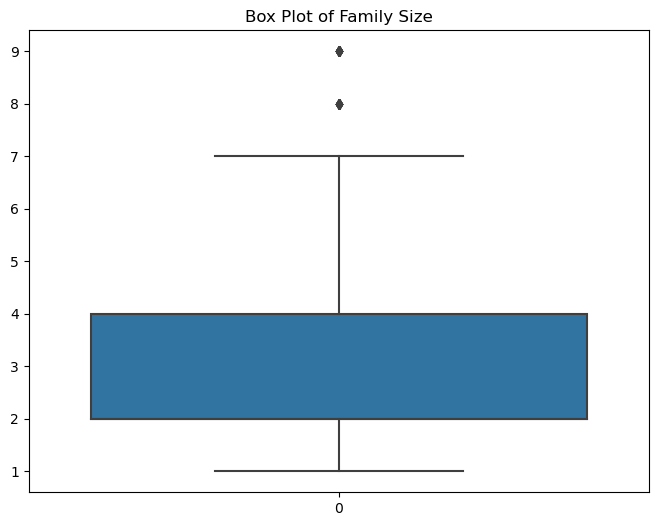

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(data['Family_Size'])
plt.title('Box Plot of Family Size')
plt.show()

SCATTER PLOT

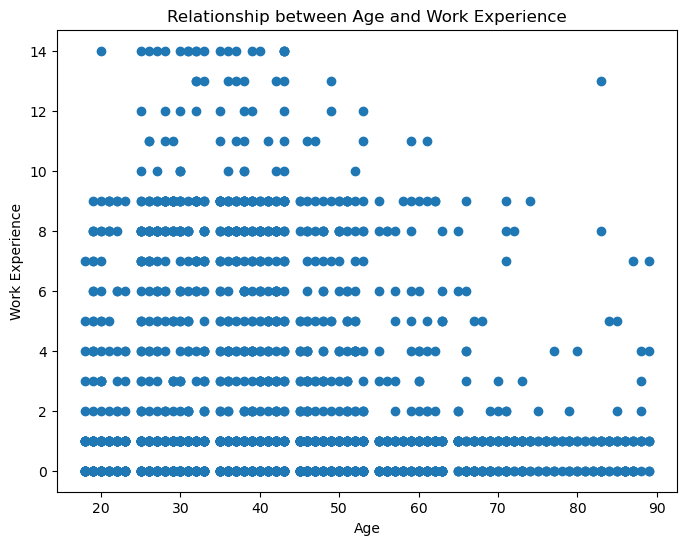

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(data['Age'],data['Work_Experience'])
plt.title('Relationship between Age and Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Experience')
plt.show()

# Correlation Matrix

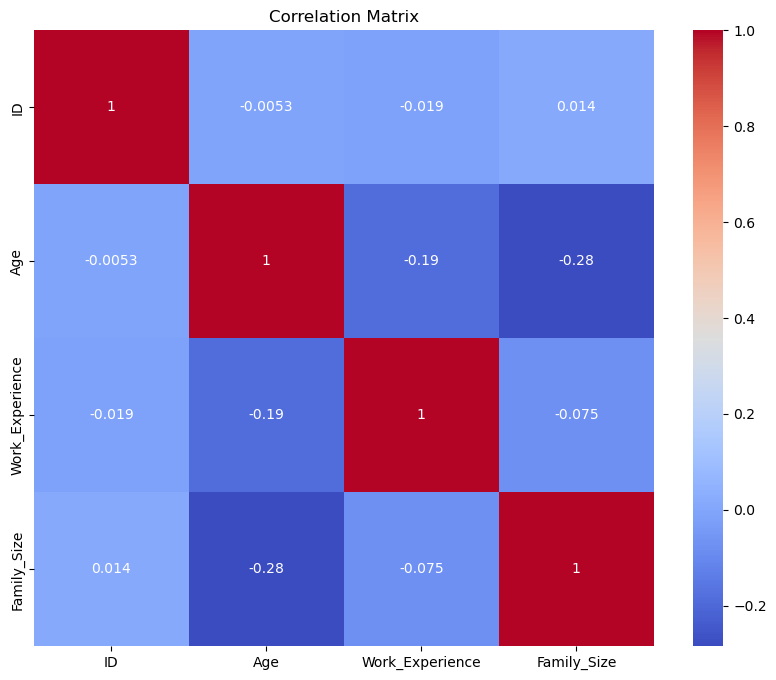

In [19]:
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
# preprocess the data
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'].map({'Male':1,'Female':0}))
data['Ever_Married']=le.fit_transform(data['Ever_Married'].map({'Yes':1,'No':0}))
data['Graduated']=le.fit_transform(data['Graduated'].map({'Yes':1,'No':0}))


In [21]:
# map spending score to numerical values
spending_score_map ={'Low':0,'Average':1,'High':2}
data['Spending_Score']=data['Spending_Score'].map(spending_score_map)

In [22]:
# handling missing values
data['Work_Experience']=data['Work_Experience'].fillna(data['Work_Experience'].mean())

In [23]:
#select relevant features
features=['Work_Experience','Family_Size','Spending_Score']

In [24]:
#scale the data
scaler=StandardScaler()
data[features]=scaler.fit_transform(data[features])

In [25]:
#apply K-Means clustering
kmeans=KMeans(n_clusters=3)
kmeans.fit(data[features])
#get cluster labels
labels=kmeans.labels_
#print cluster labels
print(labels)

[1 2 2 ... 1 0 2]


cluster0:
                  ID      Gender  Ever_Married         Age   Graduated  \
count     300.000000  300.000000         300.0  300.000000  300.000000   
mean   463459.340000    0.603333           1.0   60.116667    0.636667   
std      2634.440759    0.490023           0.0   17.172440    0.481763   
min    459003.000000    0.000000           1.0   22.000000    0.000000   
25%    461473.500000    0.000000           1.0   46.000000    0.000000   
50%    463467.500000    1.000000           1.0   60.000000    1.000000   
75%    465347.500000    1.000000           1.0   74.000000    1.000000   
max    467961.000000    1.000000           1.0   89.000000    1.000000   

       Work_Experience  Spending_Score  Family_Size  
count       300.000000    3.000000e+02   300.000000  
mean         -0.187851    2.015214e+00     0.063593  
std           0.779783    7.117299e-15     0.840062  
min          -0.762986    2.015214e+00    -1.172702  
25%          -0.762986    2.015214e+00    -0.534340  

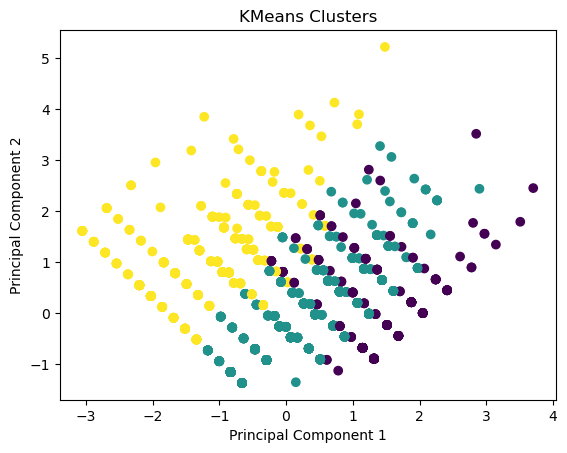

In [26]:
for cluster in range (kmeans.n_clusters):
    cluster_data = data[kmeans.labels_==cluster]
    print(f"cluster{cluster}:")
    print(cluster_data.describe())

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca=PCA(n_components=2)
pca_data=pca.fit_transform(data[features])

plt.scatter(pca_data[:,0],pca_data[:,1],c=kmeans.labels_)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KMeans Clusters")
plt.show()

1. Cluster 0 appears to consist of middle aged to older adults who were married, have a moderate level of education, and have varying levels of work experience. They have a moderate spending score and a relatively small family size.The cluster has a mix of males and females,with a slight majority of males.
2. Cluster 1 represents a group of individuals who are predominantly married,graduated, an have a wide age range. The tend to have below average work experience and spending scores but are generally part of small families. The cluster could represent established individuals in their careers and personal lives with a focus on family and education.
3. Cluster 2 seems to represent individuals who are likely in their mid to late thirties,with a balanced gender distribution.They have a moderate level of education,with about 68% being graduates.The work experience varies widely,but on average,its around 1.5 years.These individuals tend to have lower spending scores and smaller family sizes.This cluster could represent young professionals or individuals n the early stages of their careers and family life.